In [2]:
import pandas as pd
import numpy as np

stack_overflow = pd.read_feather('datasets/stack_overflow.feather')
display(stack_overflow.columns)

Index(['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code',
       'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp',
       'country', 'currency_desc', 'currency_symbol',
       'database_desire_next_year', 'database_worked_with', 'dev_type',
       'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors',
       'job_sat', 'job_seek', 'language_desire_next_year',
       'language_worked_with', 'misc_tech_desire_next_year',
       'misc_tech_worked_with', 'new_collab_tools_desire_next_year',
       'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt',
       'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn',
       'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime',
       'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck',
       'op_sys', 'org_size', 'platform_desire_next_year',
       'platform_worked_with', 'purchase_what', 'sexuality', 'so_account',
       'so_comm', 'so_part_freq'

119574.71738168952


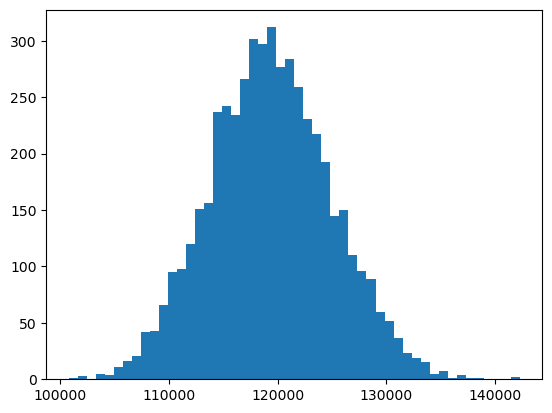

In [10]:
###################################################
#Hypothesizing about the mean
#compare a sample mean to a hypothesis value
###################################################
import matplotlib.pyplot as plt
mean_comp_samp = stack_overflow["converted_comp"].mean()
print(mean_comp_samp)

#Hypothesis is that the mean annual compensation of the population of DS is $110,000
#The sample mean of 119,574.71 is different form our hypothesis. 
#Is it meaningfully different or is it due to the variability of the samples?


#Let's generate a bootstrap distribution of sample mean
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(np.mean(stack_overflow.sample(frac=1, replace=True)["converted_comp"]))
plt.hist(so_boot_distn, bins=50)   
plt.show()
#it's bell shape, almost normaly distributed
#$110,000 is on the left side of the distribution


In [26]:
#############################################
#For hypothesis testing, calculate z-score
#############################################
#std_error of the statistic
std_error = np.std(so_boot_distn, ddof=1)
#hypothesized parameter
mean_comp_hyp = 110000
#sample mean
mean_comp_samp = stack_overflow["converted_comp"].mean()

z_score = (mean_comp_samp - mean_comp_hyp) / std_error
print(z_score)

#z_score is a standardized measure of the difference between the sample statistic
#and the hypothesized statistics

#then calculate p_value HA:Is it greater than $110000? we use a right tailed test
from scipy.stats import norm
p_value = 1-norm.cdf(z_score, loc=0, scale=1)
print(p_value)
#measure evidence against the H0 comparing p_value and the significance level
p_value < 0.05  (significance level of 5% is usually used)
#we reject H0 in favor of HA

1.7161447144332602
0.0430677795010167


True

In [27]:
###########################################
#Calculating groupwise summary statistics
###########################################
stack_overflow.groupby('age_first_code_cut')["converted_comp"].mean()

#the child programmers have a mean compensation of 132,000 dollars 
#compared to around 111,000 for adult programmers.
#Is that increase statistically significant or could it be explained by sampling variability?

#HO: the mean compensation is the SAME for those that coded first as a child than those that coded first as an adult
#HA: the mean compensation is GREATER for those thar coded first as a child compared to as an adult

xbar = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()
xbar_adult = xbar[0]
xbar_child = xbar[1]
print("adult: ", xbar_adult, "child: ", xbar_child)

s = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std()
s_adult = s[0]
s_child = s[1]
print("adult: ", s_adult, "child: ", s_child)

n = stack_overflow.groupby("age_first_code_cut")["converted_comp"].count()
n_adult = n[0]
n_child = n[1]
print("adult: ", n_adult, "child: ", n_child)


# Calculate the numerator of the test statistic
numerator = xbar_child - xbar_adult

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_adult ** 2 / n_adult + s_child ** 2 / n_child)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

# We can't draw any conclusion here (same as with z_score)


adult:  111313.31104651163 child:  132419.5706214689
adult:  271546.5217287417 child:  255585.2401149758
adult:  1376 child:  885
1.8699313316221844


In [33]:
#Ha is a greater than alternative hypothesis
#we need to use a right_tailed test

#Enter the significance level now
alpha = 0.1

degrees_of_freedom = n_adult + n_child -2
print(degrees_of_freedom)

from scipy.stats import t
p_value = 1- t.cdf(t_stat, df = degrees_of_freedom)
print(p_value)

if (p_value < alpha) == True:
    print("Reject the Null hypothesis in favor of HA: DS who started coding as children earn more !")


2259
0.030811302165157595
Reject the Null hypothesis in favor of HA: DS who started coding as children earn more !


Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64
job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64
age_cat                At least 30  Under 30
job_sat                                     
Very dissatisfied         0.490566  0.509434
Slightly dissatisfied     0.467836  0.532164
Neither                   0.432836  0.567164

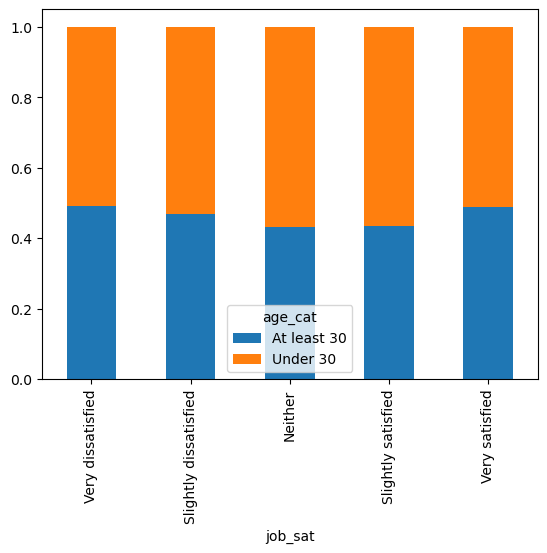

In [41]:
###################################
#Test for independence variables
###################################
print(stack_overflow["age_cat"].value_counts())
print(stack_overflow["job_sat"].value_counts())

#H0: age cat are independent of job sat levels
#HA: age cat are not independent of job sat levels
alpha=0.1

#Proportional bar plot
props = stack_overflow.groupby("job_sat")["age_cat"].value_counts(normalize=True)
wide_props = props.unstack()
print(props)
print(wide_props)

wide_props.plot(kind="bar", stacked=True)
plt.show()

#There's some variation here
#telling that age category and job_stat are not independent 
#but we need a chi_square independence test to determine if the difference is significant


In [43]:
#chi_square independent test
#!pip install pingouin
import pingouin
expected,observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)

#pval>alpha=0.1
#Fall to reject H0
#We conclude that age cat are independent of job stat


                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


In [47]:
######################################
#chi-square goodness of fit test
######################################

purple_link_counts = stack_overflow["purple_link"].value_counts()
print(purple_link_counts)

purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
print(purple_link_counts)

#create a DataFrame for hypothesis results
hypothesized = pd.DataFrame({
    'purple_link':['Amused',"Annoyed","Hello, old friend","Indifferent"],
    'prop':[1/6,1/6,1/2,1/6]})
print(hypothesized)

#H0: The sample matches the hypothesized distribution
#HA: The sample does not match the hypothesized distribution
alpha=0.01



Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64
         purple_link     n
2             Amused   368
3            Annoyed   263
0  Hello, old friend  1225
1        Indifferent   405
         purple_link      prop
0             Amused  0.166667
1            Annoyed  0.166667
2  Hello, old friend  0.500000
3        Indifferent  0.166667


         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


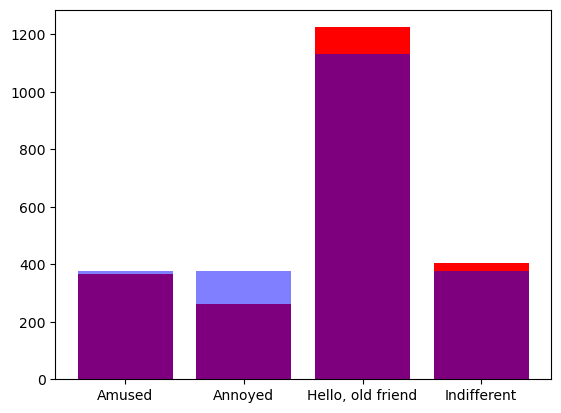

In [49]:
#visualize purple_link distribution
n_total = len(stack_overflow)
hypothesized['n'] = hypothesized["prop"] * n_total
print(hypothesized)

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend
plt.show()

#two of the responses are well modeled by the hypothesized distribution
#but two others appear different
#we need to run a HYPOTHESIZED TEST to see if the result is staistically significent


In [51]:
######################################
#Chi-square goodness of fit test
#one sample chi-square
######################################

print(hypothesized)

from scipy.stats import chisquare
chisquare(f_obs = purple_link_counts['n'],
         f_exp = hypothesized['n'])

#pvalue very small, REJECT H0 in favor of HA
#so we conclude that the sample distribution of proportions is different from the hypothesized distribution.

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)